In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
portfolio_data=pd.read_excel("data/PortfolioX.xlsx")

In [6]:
portfolio_data["Sector"].nunique()

42


Sector Distribution Summary:
      Sector           sum  count  percentage
0   TAXSTATE  6.467764e+08   1554       22.95
1   TAXLOCAL  3.615169e+08   1921       12.83
2       HOSP  2.204510e+08    328        7.82
3        USD  2.089275e+08   1158        7.41
4        WTR  1.877580e+08    967        6.66
5     PUBPWR  1.642907e+08    352        5.83
6       ARPT  1.635675e+08    253        5.80
7       TOLL  1.420340e+08    252        5.04
8   UNIVPRIV  9.427300e+07    177        3.35
9   UNIVPUBL  8.315100e+07    528        2.95
10    ESCPRE  6.100500e+07     75        2.16
11   SCHCHAR  4.505500e+07     17        1.60
12       SFM  3.710500e+07     19        1.32
13      CHEM  3.700000e+07      1        1.31
14  MASSTRAN  3.383200e+07     26        1.20
15   PREPAID  3.233500e+07     24        1.15
16      ELEC  2.918417e+07     12        1.04
17  TOBSTATE  2.692500e+07     10        0.96
18      CCRC  2.478500e+07     12        0.88
19      MULT  2.389153e+07     23        0.85
20  

/tmp/ipykernel_79526/2007313849.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=sector_distribution, x='sum', y='Sector', palette='viridis')


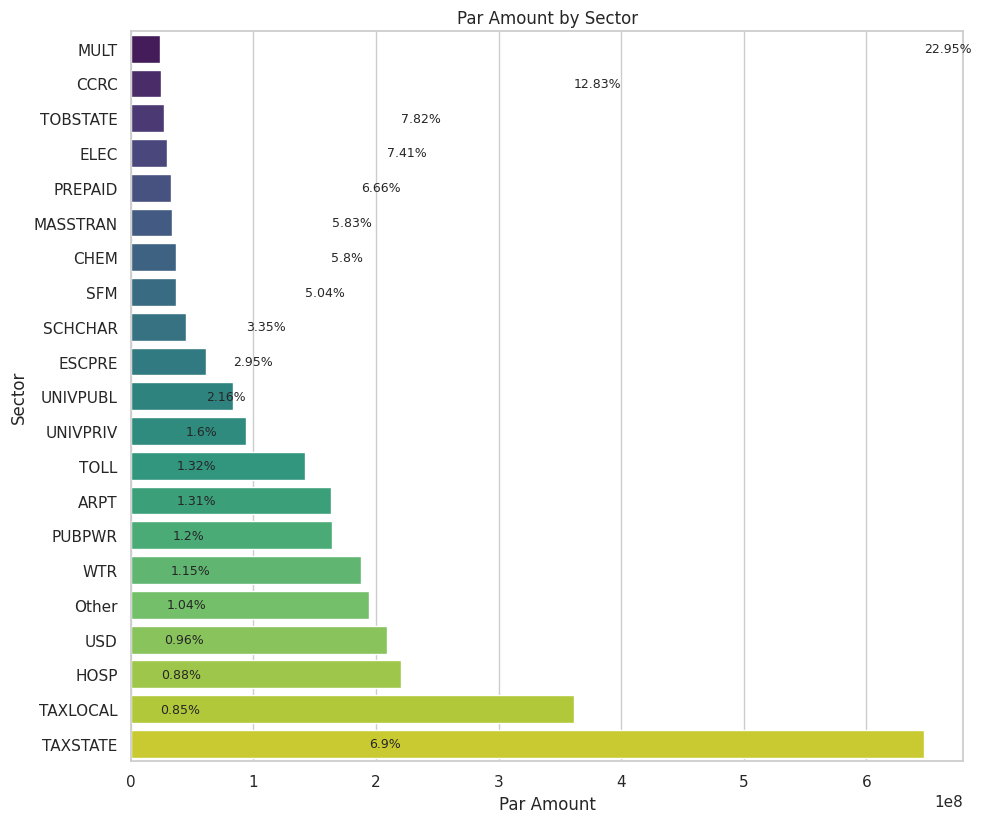

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_sector_distribution(portfolio_data, top_n=None):
    """
    Analyze the distribution of Par amount across different sectors.
    
    Args:
        portfolio_data (pd.DataFrame): Portfolio data containing 'Sector' and 'Par' columns
        top_n (int, optional): If set, keep top-N sectors and group the rest as 'Other'.
    
    Returns:
        pd.DataFrame: Summary of sector distribution
    """
    # Group by sector and calculate total par amount
    sector_distribution = portfolio_data.groupby('Sector')['Par'].agg(['sum', 'count']).reset_index()

    # Calculate percentage of total
    total_par = sector_distribution['sum'].sum()
    sector_distribution['percentage'] = (sector_distribution['sum'] / total_par * 100).round(2)

    # Sort by par amount in descending order
    sector_distribution = sector_distribution.sort_values('sum', ascending=False)

    # Optionally group into top_n sectors
    if top_n and len(sector_distribution) > top_n:
        top_sectors = sector_distribution.head(top_n)
        others = sector_distribution.iloc[top_n:]
        other_row = pd.DataFrame({
            'Sector': ['Other'],
            'sum': [others['sum'].sum()],
            'count': [others['count'].sum()],
            'percentage': [(others['sum'].sum() / total_par * 100).round(2)]
        })
        sector_distribution = pd.concat([top_sectors, other_row], ignore_index=True)

    return sector_distribution


def plot_sector_distribution(sector_distribution):
    """
    Create visualizations for sector distribution using horizontal bar chart.
    
    Args:
        sector_distribution (pd.DataFrame): Output from analyze_sector_distribution
    """
    # Set the style
    sns.set_theme(style="whitegrid")

    # Sort for better visuals (ascending so largest at top of plot)
    sector_distribution = sector_distribution.sort_values('sum')

    # Plot
    plt.figure(figsize=(10, max(6, len(sector_distribution) * 0.4)))  # dynamic height
    barplot = sns.barplot(data=sector_distribution, x='sum', y='Sector', palette='viridis')
    plt.title('Par Amount by Sector')
    plt.xlabel('Par Amount')
    plt.ylabel('Sector')

    # Add percentage labels on bars
       # Add percentage labels **inside** bars for better alignment
    for index, row in sector_distribution.iterrows():
        ax_text_pos = row['sum'] * 0.99  # position slightly inside the bar
        barplot.text(ax_text_pos, index, f"{row['percentage']}%", 
                     va='center', ha='right', fontsize=9, color='white' if row['sum'] > 0 else 'black')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Read the portfolio data
    portfolio_data = pd.read_excel('data/PortfolioX.xlsx')

    # Analyze sector distribution
    sector_distribution = analyze_sector_distribution(portfolio_data, top_n=20)  # Set top_n=None for all

    # Print summary
    print("\nSector Distribution Summary:")
    print(sector_distribution)

    # Create visualizations
    plot_sector_distribution(sector_distribution)
